In [32]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
df = pd.read_csv("weather_data.csv")
print(df.head)

<bound method NDFrame.head of               dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperat

In [34]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum)

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

In [35]:
def clean_data(frame):
    frame = frame.copy()
    frame = frame.drop(columns = ["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty", "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis = 1)
    frame["dt"] = pd.to_datetime(frame["dt"])
    frame["month"] = frame["dt"].dt.month
    frame["year"] = frame["dt"].dt.year
    frame = frame.drop(columns = ["dt"], axis = 1)
    frame = frame.dropna()
    frame = frame.drop(columns = ["month"], axis = 1)
    frame = frame.set_index(["year"])
    return frame

df = clean_data(df)
df.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
year,,,,
1850,0.749,8.242,-3.206,12.833
1850,3.071,9.970,-2.291,13.588
1850,4.954,10.347,-1.905,14.043
1850,7.217,12.934,1.018,14.667
1850,10.004,15.655,3.811,15.507


In [36]:
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


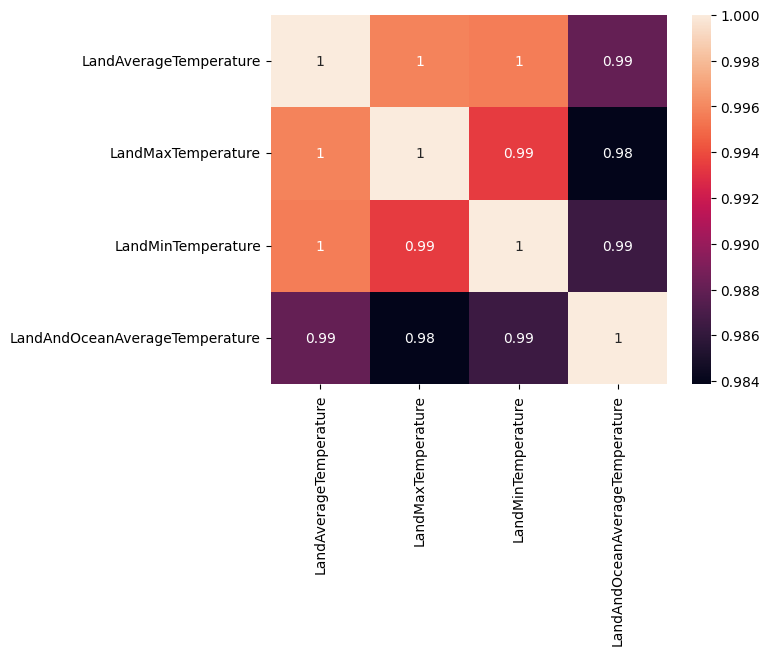

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

In [41]:
target = "LandAndOceanAverageTemperature"
y = df[target]
x = df[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]
    

In [42]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.7 MB 18.5 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 16.9 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   --- ------------------------------------ 3.7/38.5 MB 18.3 MB/s eta 0:00:02
   ------- -------------------------------- 7.3/38.5 MB 18.4 MB/s eta 0:00:02
   ----------- ---------------------------- 10.7/38.5 MB 18.5 MB/s eta 0:00:02
   --------------- ------------------------ 14.9/38.5 MB 18.3 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/38.5 MB 18.3 MB/s eta 0:00:02
   ----------------------- ---------------- 22.5/38.5 MB 18.4 MB/s eta 0:00:01
   --------------------------- ------------ 26.5/38.5 MB 18.4 MB/s eta 0:00:01
   ------------------------------- -------- 30.1/38.5 MB 18.4 MB/s eta 0:00:01
   

In [44]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x,y, test_size = 0.25, random_state = 42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


In [46]:
from sklearn.metrics import mean_squared_error
ypred = [ytrain.mean()] * len(ytrain)
print("Baseline MAE: ", mean_squared_error(ytrain,ypred))


Baseline MAE:  1.6338702518167276


In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

forest = make_pipeline(
    SelectKBest(k = "all"),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators = 100,
        max_depth = 50,
        random_state = 77,
        n_jobs = -1
    )
)
forest.fit(xtrain,ytrain)

,steps,"[('selectkbest', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,score_func,<function f_c...0028DE49FFE20>
,k,'all'
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'


In [49]:
import numpy as np
ypred = forest.predict(xval)
errors = mean_squared_error(yval, ypred)
print("Test MAE: ", errors)

Test MAE:  0.03123695865983926


In [ ]:
import numpy as np
ypred = forest.predict(xtrain)
errors = mean_squared_error(ypred, ytrain)
print("Test MAE: ", errors)

In [54]:
import pandas as pd
newData = pd.DataFrame({
    "LandAverageTemperature": [10],
    "LandMaxTemperature": [28.0],
    "LandMinTemperature": [17.0]
})
predictedTemp = forest.predict(newData)
print(f"Predicted Temperature is {predictedTemp[0]}")

Predicted Temperature is 16.47445000000001


In [55]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [57]:
%pip install joblib
joblib.dump(forest,"weather_model.pk1")

Note: you may need to restart the kernel to use updated packages.


NameError: name 'joblib' is not defined